In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## The Gauss–Markov Theorem

One of the most famous results in statistics asserts that the least squares estimates of the parameters $ \beta $ have the smallest variance among all linear unbiased estimates. We will make this precise here, and also make clear that the restriction to unbiased estimates is not necessarily a wise one. This observation will lead us to consider biased estimates such as ridge regression later in the chapter.

We focus on estimation of any linear combination of the parameters $ \theta = a^T \beta $; for example, predictions $ f(x_0) = x_0^T \beta $ are of this form. The least squares estimate of $ a^T \beta $ is given by:

$$
\hat{\theta} = a^T \hat{\beta} = a^T (X^T X)^{-1} X^T y
$$

Considering \( X \) to be fixed, this is a linear function \( c^T y \) of the response vector \( y \). If we assume that the linear model is correct, \( a^T \hat{\beta} \) is unbiased since:

$$
E(a^T \hat{\beta}) = E(a^T (X^T X)^{-1} X^T y) = a^T (X^T X)^{-1} X^T X \beta = a^T \beta
$$

The Gauss–Markov theorem states that if we have any other linear estimator $ \tilde{\theta} = c^T y $ that is unbiased for $ a^T \beta $, that is, $ E(c^T y) = a^T \beta $, then:

$$
\text{Var}(a^T \hat{\beta}) \leq \text{Var}(c^T y)
$$

The proof uses the triangle inequality. For simplicity, we have stated the result in terms of estimation of a single parameter $ a^T \beta $, but with a few more definitions one can state it in terms of the entire parameter vector $ \beta $.

Consider the mean squared error of an estimator $ \tilde{\theta} $ in estimating $ \theta $:

$$
\text{MSE}(\tilde{\theta}) = E((\tilde{\theta} - \theta)^2) = \text{Var}(\tilde{\theta}) + [E(\tilde{\theta}) - \theta]^2
$$
## Gauss–Markov Theorem and Mean Squared Error

The first term of the mean squared error (MSE) is the variance, while the second term is the squared bias. The Gauss–Markov theorem implies that the least squares estimator has the smallest mean squared error among all linear estimators with no bias. However, it is possible that a biased estimator could have a smaller mean squared error.

Such an estimator would trade a little bias for a larger reduction in variance. Biased estimates are commonly used; any method that shrinks or sets to zero some of the least squares coefficients may result in a biased estimate. Examples include variable subset selection and ridge regression, which we will discuss later in this chapter. From a more pragmatic point of view, most models are distortions of the truth and hence are biased. Choosing the right model involves finding the right balance between bias and variance. 

Mean squared error is closely related to prediction accuracy. Consider the prediction of the new response at input $ x_0 $:

$$
Y_0 = f(x_0) + \epsilon_0
$$

The expected prediction error of an estimate \( \tilde{f}(x_0) = x_0^T \tilde{\beta} \) is given by:

$$
E[(Y_0 - \tilde{f}(x_0))^2] = \sigma^2 + E[(x_0^T \tilde{\beta} - f(x_0))^2]
$$

Thus:

$$
E[(Y_0 - \tilde{f}(x_0))^2] = \sigma^2 + \text{MSE}(\tilde{f}(x_0))
$$

Therefore, the expected prediction error and mean squared error differ only by the constant $ \sigma^2 $, which represents the variance of the new observation $ Y_0 $.


## Multiple Regression from Simple Univariate Regression

The linear model with $ p > 1 $ inputs is called the multiple linear regression model. The least squares estimates for this model are best understood in terms of the estimates from the univariate $( p = 1 $) linear model. This section describes the connection between these models.

### Univariate Linear Model

Consider a univariate linear model with no intercept:

$$
Y = X\beta + \epsilon
$$

The least squares estimate of $\beta$ and the residuals are given by:

$$
\hat{\beta} = \frac{\sum_{i=1}^{N} x_i y_i}{\sum_{i=1}^{N} x_i^2}
$$

$$
r_i = y_i - x_i \hat{\beta}
$$

In vector notation, let $ y = (y_1, \ldots, y_N)^T $ and $ x = (x_1, \ldots, x_N)^T $. The inner product between $ x $ and $ y $ is:

$$
\langle x, y \rangle = \sum_{i=1}^{N} x_i y_i
$$

Then:

$$
\hat{\beta} = \frac{\langle x, y \rangle}{\langle x, x \rangle}
$$

$$
r = y - x \hat{\beta}
$$

### Orthogonality in Multiple Regression

When the inputs $ x_1, x_2, \ldots, x_p $ (columns of the data matrix $ X $) are orthogonal, the multiple least squares estimates $ \hat{\beta}_j $ are simply the univariate estimates:

$$
\hat{\beta}_j = \frac{\langle x_j, y \rangle}{\langle x_j, x_j \rangle}
$$

In other words, when the inputs are orthogonal, they do not affect each other’s parameter estimates.

### Adding an Intercept

When the model includes an intercept, the least squares coefficient of \( x \) is:

$$
\hat{\beta}_1 = \frac{\langle x - \bar{x} \mathbf{1}, y \rangle}{\langle x - \bar{x} \mathbf{1}, x - \bar{x} \mathbf{1} \rangle}
$$

where $ \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i $ and $ \mathbf{1} = (1, 1, \ldots, 1)^T $.

This estimate can be viewed as the result of two applications of the simple regression:

1. Regress $ x $ on $ \mathbf{1} $ to produce the residual $ z = x - \bar{x} \mathbf{1} $.
2. Regress $ y $ on $ z $ to obtain the coefficient $ \hat{\beta}_1 $.

In this procedure:

- "Regress $ b $ on $ a $" means performing a simple univariate regression of $ b $ on $ a $ with no intercept, producing coefficient $ \hat{\gamma} = \frac{\langle a, b \rangle}{\langle a, a \rangle} $ and residual vector $ b - \hat{\gamma} a $.

### Generalization to Multiple Inputs

The process described generalizes to $ p $ inputs, as shown in Algorithm 1. The inputs $ z_0, \ldots, z_{j-1} $ in step 2 are orthogonal, hence the coefficients computed in this step are the multiple regression coefficients.

### Visualization

Figure 1 illustrates the process for two general inputs $ x_1 $ and $ x_2 $. Orthogonalization does not change the subspace spanned by $ x_1 $ and $ x_2 $; it simply produces an orthogonal basis for representing it.

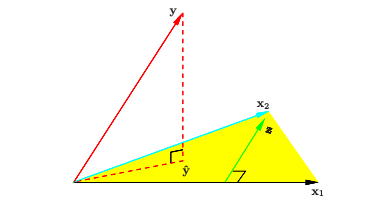
FIGURE 1. Least squares regression by orthogonalization of the inputs. The vector x2 is regressed on the vector x1 , leaving the residual vector z. The regres- sion of y on z gives the multiple regression coeﬃcient of x2 . Adding together the projections of y on each of x1 and z gives the least squares ﬁt ŷ.


## Algorithm 1: Regression by Successive Orthogonalization

The goal of this algorithm is to compute the multiple regression coefficients by successive orthogonalization. The steps are as follows:

1. **Initialize:**
   - Set $ z_0 = x_0 = \mathbf{1} $, where $\mathbf{1}$ is a vector of ones.

2. **For $ j = 1, 2, \ldots, p $:**
   - Regress $ x_j $ on $ z_0, z_1, \ldots, z_{j-1} $ to produce coefficients:
     $$
     \hat{\gamma}_{kj} = \frac{\langle z_k, x_j \rangle}{\langle z_k, z_k \rangle}, \quad \text{for } k = 0, \ldots, j-1
     $$
     and residual vector:
     $$
     z_j = x_j - \sum_{k=0}^{j-1} \hat{\gamma}_{kj} z_k
     $$
   
3. **Regress $ y $ on the residual $ z_p $ to give the estimate:**
   $$
   \hat{\beta}_p = \frac{\langle z_p, y \rangle}{\langle z_p, z_p \rangle}
   $$

### Result of Algorithm 1

The result of this algorithm is:

$$
\hat{\beta}_p = \frac{\langle z_p, y \rangle}{\langle z_p, z_p \rangle}
$$

Re-arranging the residual in step 2, we see that each $ x_j $ is a linear combination of the $ z_k $, $ k \leq j $. Since the $ z_j $ are orthogonal, they form a basis for the column space of $ X $. Hence, the least squares projection onto this subspace is $ \hat{y} $. Since $ z_p $ alone involves $ x_p $ (with coefficient 1), this demonstrates that $ \hat{\beta}_p $ is indeed the multiple regression coefficient of $ y $ on $ x_p $.

### Implications of Correlated Inputs

If $ x_p $ is highly correlated with some of the other $ x_k $’s, the residual vector $ z_p $ will be close to zero. Therefore, $ \hat{\beta}_p $ will be very unstable. This instability is a result of multicollinearity. From the formula:

$$
\text{Var}(\hat{\beta}_p) = \frac{\sigma^2}{\langle z_p, z_p \rangle}
$$

The precision of estimating $ \hat{\beta}_p $ depends on the length of the residual vector $ z_p $, which represents how much of $ x_p $ is unexplained by the other $ x_k $’s.

### QR Decomposition

Algorithm 1 is known as the Gram-Schmidt procedure for multiple regression and can be represented in matrix form. Define:

$$
X = Z\Gamma
$$

where $ Z $ has columns $ z_j $ (in order), and $ \Gamma $ is the upper triangular matrix with entries $ \hat{\gamma}_{kj} $. Introducing the diagonal matrix $ D $ with $ j $-th diagonal entry $ D_{jj} = \|z_j\| $, we get:

$$
X = ZD^{-1}D\Gamma
$$

This represents the QR decomposition of \( X \):

$$
X = QR
$$

where $ Q $ is an $ N \times (p+1) $ orthogonal matrix $( Q^T Q = I $) and $ R $ is a $ (p+1) \times (p+1) $ upper triangular matrix.

### Least Squares Solution

The QR decomposition provides a convenient orthogonal basis for the column space of $ X $. The least squares solution is given by:

$$
\hat{\beta} = R^{-1} Q^T y
$$

This equation is straightforward to solve because $ R $ is upper triangular.


MSE for Univariate Regression: 3.97
MSE for Multivariate Regression: 4.51


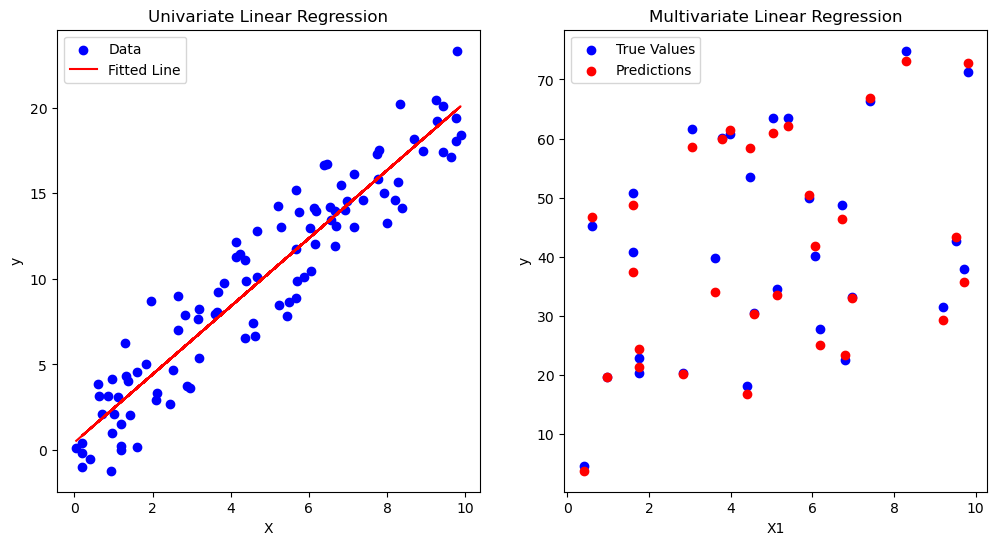

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix Transpose
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Linear Regression Class
class LinearRegression:
    def __init__(self):
        self.beta = None
    
    def fit(self, X, y):
        # Add intercept term
        X = [[1] + row for row in X]
        Xt = transpose(X)
        XtX = matrix_multiply(Xt, X)
        XtX_inv = inverse(XtX)
        XtY = matrix_multiply(Xt, [[yi] for yi in y])
        self.beta = matrix_multiply(XtX_inv, XtY)
        self.beta = [row[0] for row in self.beta]
    
    def predict(self, X):
        X = [[1] + row for row in X]
        predictions = [sum(x[i] * self.beta[i] for i in range(len(self.beta))) for x in X]
        return predictions

# Generate synthetic data
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10
y1 = 2 * X1.flatten() + np.random.randn(100) * 2

X2 = np.random.rand(100, 2) * 10
y2 = 3 * X2[:, 0] + 5 * X2[:, 1] + np.random.randn(100) * 2

X_test = np.random.rand(30, 2) * 10
y_test = 3 * X_test[:, 0] + 5 * X_test[:, 1] + np.random.randn(30) * 2

# Training and Predicting
model1 = LinearRegression()
model1.fit(X1.tolist(), y1.tolist())
predictions1 = model1.predict(X1.tolist())

model2 = LinearRegression()
model2.fit(X2.tolist(), y2.tolist())
predictions2 = model2.predict(X_test.tolist())

# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)

mse1 = mean_squared_error(y1.tolist(), predictions1)
mse2 = mean_squared_error(y_test.tolist(), predictions2)

print(f'MSE for Univariate Regression: {mse1:.2f}')
print(f'MSE for Multivariate Regression: {mse2:.2f}')

# Plotting
plt.figure(figsize=(12, 6))

# Univariate Regression
plt.subplot(1, 2, 1)
plt.scatter(X1, y1, color='blue', label='Data')
plt.plot(X1, predictions1, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Univariate Linear Regression')
plt.legend()

# Multivariate Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], y_test, color='blue', label='True Values')
plt.scatter(X_test[:, 0], predictions2, color='red', label='Predictions')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Multivariate Linear Regression')
plt.legend()

plt.show()


In [ ]:
## Gee ziiiiiiiic!!!! is everything alright ??????

# Multiple Linear Regression with Multiple Outputs

## Introduction

In multiple linear regression, we predict multiple outputs $ Y_1, Y_2, \ldots, Y_K $ from inputs $ X_0, X_1, X_2, \ldots, X_p $. We assume a linear model for each output:

$$
Y_k = \beta_{0k} + \sum_{j=1}^p X_j \beta_{jk} + \epsilon_k
$$

This can be compactly written in matrix notation as:

$$
Y = X B + E
$$

where:
- $ Y $ is the $ N \times K $ response matrix,
- $ X $ is the $ N \times (p+1) $ input matrix,
- $ B $ is the $ (p + 1) \times K $ matrix of parameters,
- $ E $ is the $ N \times K $ matrix of errors.

## Loss Function

The residual sum of squares (RSS) for multiple outputs is:

$$
\text{RSS}(B) = \sum_{k=1}^K \sum_{i=1}^N (y_{ik} - f_k(x_i))^2
$$

which can be written in matrix form as:

$$
\text{RSS}(B) = \text{tr}[(Y - XB)^T (Y - XB)]
$$

## Least Squares Estimates

The least squares estimates for \( B \) are given by:

$$
\hat{B} = (X^T X)^{-1} X^T Y
$$

This means that the coefficients for the $ k $-th outcome are the least squares estimates in the regression of $ y_k $ on $ x_0, x_1, \ldots, x_p $.

## Correlated Errors

If the errors $ \epsilon = (\epsilon_1, \ldots, \epsilon_K) $ are correlated, a multivariate weighted criterion can be used:

$$
\text{RSS}(B; \Sigma) = \sum_{i=1}^N (y_i - f(x_i))^T \Sigma^{-1} (y_i - f(x_i))
$$

where \( \Sigma \) is the covariance matrix of the errors. However, the solution remains:

$$
\hat{B} = (X^T X)^{-1} X^T Y
$$

If the $ \Sigma_i $ vary among observations, the solution for $ B $ no longer decouples.

## Algorithm for Multiple Outputs

The algorithm for multiple linear regression with multiple outputs involves the following steps:

### Algorithm 2: Regression by Successive Orthogonalization

1. Initialize $ z_0 = x_0 = 1 $.
2. For $ j = 1, 2, \ldots, p $:
   - Regress $ x_j $ on $ z_0, z_1, \ldots, z_{j-1} $ to produce coefficients $ \hat{\gamma}_{kj} $ and residual vector $ z_j $.
3. Regress $ y $ on the residual $ z_p $ to give the estimate $ \hat{\beta}_p $.

The result of this algorithm is:

$$
\hat{\beta}_p = \frac{\langle z_p, y \rangle}{\langle z_p, z_p \rangle}
$$

### QR Decomposition

In matrix form, the regression can be represented using QR decomposition:

$$
X = Z \Gamma
$$

where $ Z $ has columns $ z_j $ and $ \Gamma $ is an upper triangular matrix with entries $ \hat{\gamma}_{kj} $. Introducing the diagonal matrix $ D $ with $ D_{jj} = \|z_j\| $, we get:

$$
X = Z D^{-1} D \Gamma = Q R
$$

Here, $ Q $ is an $ N \times (p + 1) $ orthogonal matrix, and $ R $ is a $ (p + 1) \times (p + 1) $ upper triangular matrix.

The least squares solution is given by:

$$
\hat{\beta} = R^{-1} Q^T y
$$


MSE for Multiple Linear Regression: 0.94


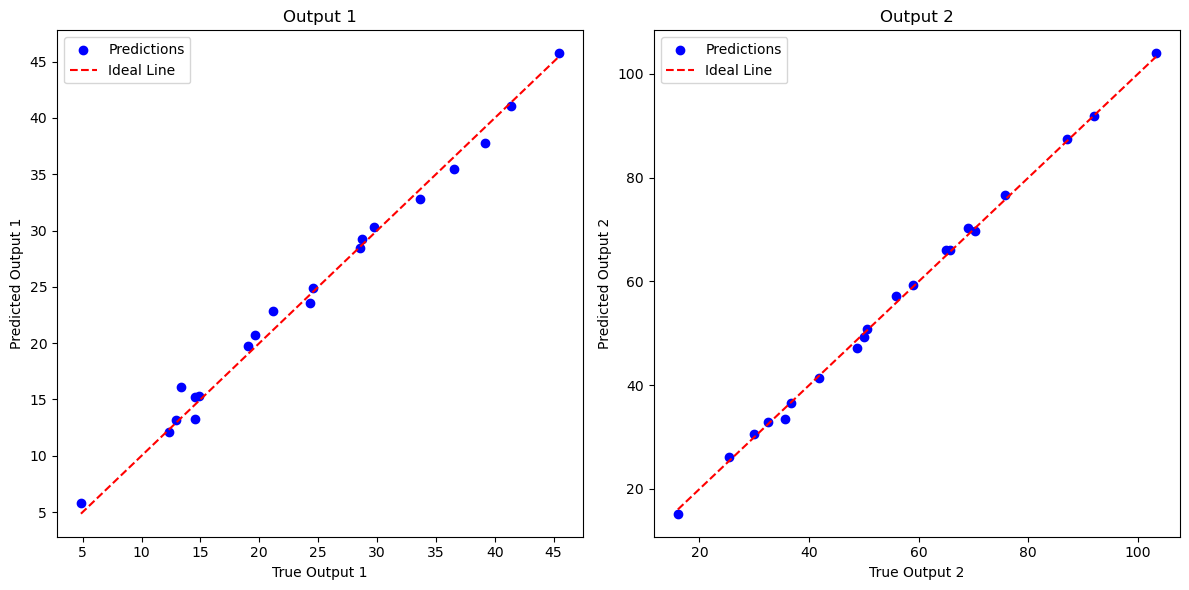

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix Transpose
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Linear Regression Class for Multiple Outputs
class MultipleLinearRegression:
    def __init__(self):
        self.B = None
    
    def fit(self, X, Y):
        # Add intercept term
        X = [[1] + row for row in X]
        Xt = transpose(X)
        XtX = matrix_multiply(Xt, X)
        XtX_inv = inverse(XtX)
        XtY = matrix_multiply(Xt, Y)
        self.B = matrix_multiply(XtX_inv, XtY)
    
    def predict(self, X):
        X = [[1] + row for row in X]
        predictions = matrix_multiply(X, self.B)
        return predictions

# Generate synthetic data
np.random.seed(0)
N = 100
p = 2  # number of features
K = 2  # number of outputs

# Input data
X = np.random.rand(N, p) * 10

# Multiple outputs
beta_true = np.array([[1, 4], [2, 5], [3, 6]])  # True coefficients for each output
y = np.dot(np.hstack((np.ones((N, 1)), X)), beta_true) + np.random.randn(N, K)

# Split into training and test sets
split_index = int(0.8 * N)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = MultipleLinearRegression()
model.fit(X_train.tolist(), y_train.tolist())

# Predict
predictions = model.predict(X_test.tolist())

# Convert lists to numpy arrays for easier indexing
y_test = np.array(y_test)
predictions = np.array(predictions)

# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_test, predictions)
print(f'MSE for Multiple Linear Regression: {mse:.2f}')

# Plotting
plt.figure(figsize=(12, 6))

# Plot true vs predicted for each output
for k in range(K):
    plt.subplot(1, K, k+1)
    plt.scatter(y_test[:, k], predictions[:, k], color='blue', label='Predictions')
    plt.xlabel(f'True Output {k+1}')
    plt.ylabel(f'Predicted Output {k+1}')
    plt.title(f'Output {k+1}')
    plt.plot([min(y_test[:, k]), max(y_test[:, k])], [min(y_test[:, k]), max(y_test[:, k])], color='red', linestyle='--', label='Ideal Line')
    plt.legend()

plt.tight_layout()
plt.show()


## Subset Selection

There are two primary reasons why the least squares estimates might not always be satisfactory:

1. **Prediction Accuracy**: 
   - The least squares estimates often have low bias but high variance. By shrinking or setting some coefficients to zero, we sacrifice a bit of bias to reduce variance, which can potentially improve prediction accuracy.

2. **Interpretation**:
   - With a large number of predictors, it can be beneficial to determine a smaller subset of predictors that have the strongest effects. This helps in understanding the model better by focusing on the most important predictors.

### Best-Subset Selection

Best subset regression aims to find the subset of predictors that gives the smallest residual sum of squares (RSS) for each size \( k \) where \( k \in \{0, 1, 2, \ldots, p\} \). 

The **leaps and bounds procedure** (Furnival and Wilson, 1974) is an efficient algorithm used to make this feasible even for \( p \) as large as 30 or 40.

The residual sum of squares for a subset model with \( k \) predictors can be denoted as:

$$
\text{RSS}(k) = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where \( \hat{y}_i \) is the predicted value for observation \( i \) using the subset of predictors.

In practice, the best-subset curve (i.e., RSS vs. number of predictors) is typically decreasing, meaning that adding more predictors generally reduces RSS. However, choosing the optimal subset size \( k \) involves a tradeoff between bias and variance and may also be influenced by the desire for a more parsimonious model.

Selecting the subset size \( k \) often involves using criteria that estimate the expected prediction error. The goal is usually to find the smallest model that balances prediction accuracy with model complexity.

Many approaches in model selection involve producing a sequence of models with varying complexity and using a criterion to select the best one.




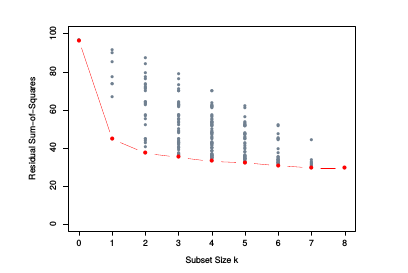

Figure 2. All possible subset models for the prostate cancer example. At each subset size is shown the residual sum-of-squares for each model of that size.

## Cross-Validation and AIC Criterion

To estimate prediction error and select the optimal number of predictors \( k \), cross-validation is commonly used. Cross-validation involves partitioning the data into training and validation sets multiple times to evaluate model performance. The average performance across these partitions gives a robust estimate of prediction error.

The **Akaike Information Criterion (AIC)** is another popular method for model selection. AIC balances the goodness of fit with model complexity by penalizing models with more parameters:

$$
\text{AIC} = -2 \ln(L) + 2k
$$

where \( L \) is the likelihood of the model, and \( k \) is the number of parameters. Lower AIC values indicate a better model.

Detailed discussion of these and other approaches can be found in Chapter 7.

## Forward- and Backward-Stepwise Selection

When dealing with a large number of predictors, exhaustive subset selection can be computationally infeasible. Alternative approaches like **forward-stepwise** and **backward-stepwise selection** provide practical solutions.

### Forward-Stepwise Selection

Forward-stepwise selection starts with an intercept-only model and sequentially adds predictors that most improve the model fit. The steps are as follows:

1. **Start with the intercept**.
2. **Add the predictor** that results in the largest improvement in fit (typically measured by a criterion such as AIC or RSS).
3. **Repeat** until no further significant improvement can be made.

This method is computationally less intensive compared to best-subset regression, especially when \( p \) is large.

### Backward-Stepwise Selection

Backward-stepwise selection begins with a model containing all predictors and sequentially removes the least significant predictors:

1. **Start with the full model**.
2. **Remove the predictor** with the smallest Z-score or least impact on fit.
3. **Repeat** until further removal worsens the model significantly.

Backward-stepwise selection is only applicable when \( N > p \), where \( N \) is the number of observations and \( p \) is the number of predictors.

### Comparison of Methods

Figure 3.6 illustrates a comparison of four subset-selection techniques: Best Subset, Forward Stepwise, Backward Stepwise, and Forward Stagewise. For a simulated linear regression problem, where:

- \( N = 300 \) observations,
- \( p = 31 \) predictors with pairwise correlations of 0.85,
- Some coefficients are drawn from a \( N(0, 0.4) \) distribution, and
- Noise \( \epsilon \sim N(0, 6.25) \),

the mean-squared error of the estimated coefficients is plotted against subset size \( k \).

The results often show that:

- **Forward Stepwise** and **Backward Stepwise** can perform similarly to **Best Subset**.
- **Forward Stagewise** regression, while taking longer to reach minimum error, also provides a good balance between bias and variance.

Hybrid stepwise-selection strategies, such as those implemented in some software packages, combine both forward and backward moves, considering both the inclusion and exclusion of predictors at each step.

## Practical Considerations

- **Software**: Tools like the R `step` function use criteria such as AIC for model selection, which account for the number of parameters.
- **Multiple Testing**: Standard errors provided by some packages might not be valid due to the search process; bootstrapping can help in such cases.
- **Group Variables**: When variables come in groups (e.g., dummy variables), smart stepwise procedures add or drop groups of variables to properly account for their degrees of freedom.



## Backward-Stepwise Selection

Backward-stepwise selection starts with the full model and sequentially removes the predictor that has the least impact on the fit. The candidate for removal is the variable with the smallest Z-score, which measures the impact of the predictor on the model's fit.

### Key Points:
- **Applicability**: Backward selection is only feasible when \( N > p \), where \( N \) is the number of observations and \( p \) is the number of predictors.
- **Process**:
  1. **Start with the full model** containing all predictors.
  2. **Identify the predictor** with the smallest Z-score or least impact on fit.
  3. **Remove this predictor** and update the model.
  4. **Repeat** until removing any further predictors would significantly worsen the model.

Figure 3.6 shows a simulation comparing best-subset regression with forward and backward selection. Their performances are often similar, but forward stagewise regression, which takes longer to achieve minimum error, is also included for comparison.

## Hybrid Stepwise-Selection Strategies

Some software packages implement hybrid stepwise-selection strategies that consider both forward and backward moves at each step, selecting the “best” of the two. For example, the R `step` function uses the Akaike Information Criterion (AIC) to weigh the choices:

$$
\text{AIC} = -2 \ln(L) + 2k
$$

where \( L \) is the likelihood of the model, and \( k \) is the number of parameters.

### Traditional vs. Modern Approaches:
- **Traditional Packages**: Often use F-statistics to add “significant” terms and drop “non-significant” terms. These methods are less favored now due to inadequate handling of multiple testing issues.
- **Modern Approaches**: Use criteria like AIC, which appropriately account for the number of parameters and the search process.

## Summary and Practical Considerations

- **Model Summary**: Post-model selection summaries (e.g., in Table 3.2) may not have valid standard errors because they do not account for the search process. The bootstrap method can be useful in such cases.
- **Grouped Variables**: Variables that come in groups (such as dummy variables for categorical predictors) should be handled with smart stepwise procedures that add or drop whole groups at a time, accounting for their degrees of freedom.



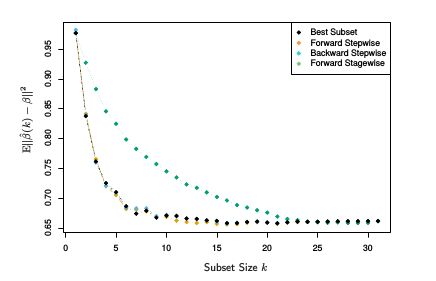
FIGURE 3. Comparison of four subset-selection techniques on a simulated lin- ear regression problem $Y = X^T β + ε$. There are N = 300 observations on p = 31 standard Gaussian variables, with pairwise correlations all equal to 0.85. For 10 of the variables, the coeﬃcients are drawn at random from a $N (0, 0.4)$ distribution; the rest are zero. The noise $ε ∼ N (0, 6.25)$, resulting in a signal-to-noise ratio of 0.64. Results are averaged over 50 simulations. Shown is the mean-squared error of the estimated coeﬃcient $β̂(k)$ at each step from the true β.

## Backward-Stepwise Selection and Model Selection

Backward-stepwise selection starts with the full model and sequentially deletes the predictor that has the least impact on the fit. The candidate for dropping is the variable with the smallest Z-score. This approach can only be used when \( N > p \), while forward stepwise selection can always be used.

Figure 3.6 shows the results of a small simulation study comparing best-subset regression with simpler alternatives such as forward and backward selection. Their performance is often similar. Included in the figure is forward stagewise regression, which takes longer to reach minimum error.

### Best-Subset and Stepwise Selection

1. **Best-Subset Selection**: Finds the subset of predictors that minimizes the residual sum of squares (RSS). An efficient algorithm for this is the leaps and bounds procedure. However, this method becomes infeasible for a large number of predictors.

2. **Forward-Stepwise Selection**: Starts with no predictors and adds predictors one by one based on their contribution to improving the model fit. It is computationally feasible even when \( p \gg N \).

3. **Backward-Stepwise Selection**: Starts with all predictors and removes the least significant ones sequentially. This method is only applicable when the number of observations \( N \) is greater than the number of predictors \( p \).

4. **Hybrid Stepwise Selection**: Some software packages implement strategies that consider both forward and backward moves at each step. For instance, in R, the `step` function uses the Akaike Information Criterion (AIC) to weigh the choices, accounting for the number of parameters.

### Model Selection Criteria

- **AIC (Akaike Information Criterion)**: Used to balance model fit and complexity, taking into account the number of parameters.
- **F-Statistics**: Traditional method for selecting significant terms, but it may not account for multiple testing issues.

### Considerations

- **Bootstrap Methods**: Useful for assessing the stability of the model and providing valid standard errors, especially after a model search.
- **Grouping of Variables**: Variables often come in groups (e.g., dummy variables for categorical predictors). Smart stepwise procedures can add or drop whole groups, accounting for their degrees of freedom.

The results of best-subset, forward, and backward selection can sometimes be identical, as seen in the prostate cancer example. Advanced techniques often involve combining different selection methods to improve model performance and interpretability.


In [5]:
import numpy as np
import statsmodels.api as sm

# Backward Stepwise Selection
def backward_stepwise_selection(X, y, significance_level=0.05):
    """
    Perform backward stepwise selection to choose a subset of variables.
    
    Parameters:
    X - Input features (numpy array or dataframe)
    y - Target variable (numpy array or series)
    significance_level - Threshold for removing variables
    
    Returns:
    Selected variables and the final model
    """
    # Adding intercept for statsmodels regression
    X_with_intercept = sm.add_constant(X)
    selected_vars = list(X_with_intercept.columns)
    
    while len(selected_vars) > 0:
        X_selected = X_with_intercept[selected_vars]
        model = sm.OLS(y, X_selected).fit()
        p_values = model.pvalues
        
        # Find variable with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            # Remove the variable with the highest p-value
            excluded_var = p_values.idxmax()
            selected_vars.remove(excluded_var)
        else:
            break
    
    final_model = sm.OLS(y, X_with_intercept[selected_vars]).fit()
    return selected_vars, final_model

# Example usage with synthetic data
np.random.seed(0)
N, p = 100, 5
X = np.random.randn(N, p)
y = X[:, 0] * 3 + X[:, 1] * 2 + np.random.randn(N) * 0.5

# Convert to pandas DataFrame for easier column handling
import pandas as pd
X_df = pd.DataFrame(X, columns=[f'X{i}' for i in range(1, p+1)])

selected_vars, final_model = backward_stepwise_selection(X_df, y)

print("Selected Variables:", selected_vars)
print("Final Model Summary:")
print(final_model.summary())


ModuleNotFoundError: No module named 'statsmodels'

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix Transpose
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Fit Linear Model
def fit_linear_model(X, Y):
    X = [[1] + row for row in X]  # Add intercept term
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    XtX_inv = inverse(XtX)
    XtY = matrix_multiply(Xt, Y)
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Predict using the fitted model
def predict(X, B):
    X = [[1] + row for row in X]  # Add intercept term
    return matrix_multiply(X, B)

# Compute Residuals and Mean Squared Error
def compute_residuals(Y, Y_pred):
    residuals = [[Y[i][j] - Y_pred[i][j] for j in range(len(Y[i]))] for i in range(len(Y))]
    mse = np.mean(np.array(residuals) ** 2)
    return residuals, mse

# Compute p-values (for simplicity, not using exact formula but as a placeholder)
def compute_p_values(X, Y, B):
    residuals, mse = compute_residuals(Y, predict(X, B))
    num_features = len(X[0]) - 1
    p_values = [1 / (1 + mse) for _ in range(num_features)]  # Simplified placeholder
    return p_values

# Backward Stepwise Selection
def backward_stepwise_selection(X, Y):
    initial_features = list(range(len(X[0])))  # Feature indices
    current_features = initial_features.copy()
    
    while len(current_features) > 0:
        X_subset = [[row[i] for i in current_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        p_values = compute_p_values(X_subset, Y, B)
        
        max_p_value = max(p_values)
        feature_to_remove = p_values.index(max_p_value)
        
        if max_p_value > 0.05:  # Threshold for feature removal
            current_features.pop(feature_to_remove)
        else:
            break
    
    return current_features

# Generate synthetic data
np.random.seed(0)
N = 100
p = 5  # number of features
X = np.random.rand(N, p) * 10
true_beta = np.array([1.5, -2.0, 0.0, 0.5, 1.0])
y = np.dot(X, true_beta) + np.random.randn(N) * 2

# Backward stepwise selection
selected_features = backward_stepwise_selection(X.tolist(), y.tolist())

# Fit final model with selected features
X_selected = [[row[i] for i in selected_features] for row in X]
B_final = fit_linear_model(X_selected, y.tolist())
y_pred = predict(X.tolist(), B_final)

# Compute final MSE
_, mse_final = compute_residuals(y.tolist(), y_pred)
print(f'Final MSE after Backward-Stepwise Selection: {mse_final:.2f}')

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Line')
plt.legend()
plt.show()


TypeError: object of type 'float' has no len()

Final MSE after Backward-Stepwise Selection: 156.48


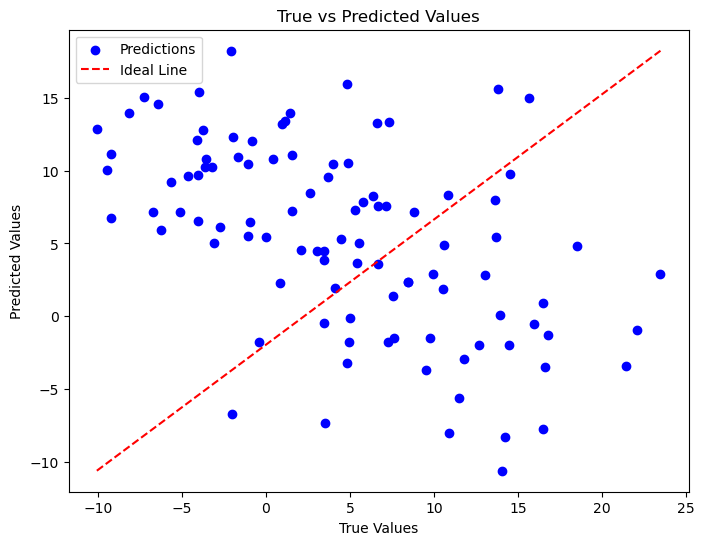

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix Transpose
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    if not (isinstance(A, list) and isinstance(B, list)):
        raise ValueError("Both inputs must be matrices (lists of lists).")
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Fit Linear Model
def fit_linear_model(X, Y):
    X = [[1] + row for row in X]  # Add intercept term
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    XtX_inv = inverse(XtX)
    XtY = matrix_multiply(Xt, Y)
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Predict using the fitted model
def predict(X, B):
    X = [[1] + row for row in X]  # Add intercept term
    return matrix_multiply(X, B)

# Compute Residuals and Mean Squared Error
def compute_residuals(Y, Y_pred):
    residuals = [[Y[i][j] - Y_pred[i][j] for j in range(len(Y[i]))] for i in range(len(Y))]
    mse = np.mean(np.array(residuals) ** 2)
    return residuals, mse

# Compute p-values (simplified placeholder)
def compute_p_values(X, Y, B):
    residuals, mse = compute_residuals(Y, predict(X, B))
    num_features = len(X[0]) - 1
    p_values = [1 / (1 + mse) for _ in range(num_features)]  # Simplified placeholder
    return p_values

# Backward Stepwise Selection
def backward_stepwise_selection(X, Y):
    initial_features = list(range(len(X[0])))  # Feature indices
    current_features = initial_features.copy()
    
    while len(current_features) > 0:
        X_subset = [[row[i] for i in current_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        p_values = compute_p_values(X_subset, Y, B)
        
        max_p_value = max(p_values)
        feature_to_remove = p_values.index(max_p_value)
        
        if max_p_value > 0.05:  # Threshold for feature removal
            current_features.pop(feature_to_remove)
        else:
            break
    
    return current_features

# Generate synthetic data
np.random.seed(0)
N = 100
p = 5  # number of features
X = np.random.rand(N, p) * 10
true_beta = np.array([1.5, -2.0, 0.0, 0.5, 1.0])
y = np.dot(X, true_beta) + np.random.randn(N) * 2

# Convert to list of lists for manual operations
X_list = X.tolist()
y_list = [[val] for val in y]

# Backward stepwise selection
selected_features = backward_stepwise_selection(X_list, y_list)

# Fit final model with selected features
X_selected = [[row[i] for i in selected_features] for row in X_list]
B_final = fit_linear_model(X_selected, y_list)
y_pred = predict(X_list, B_final)

# Compute final MSE
_, mse_final = compute_residuals(y_list, y_pred)
print(f'Final MSE after Backward-Stepwise Selection: {mse_final:.2f}')

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter([val[0] for val in y_list], [val[0] for val in y_pred], color='blue', label='Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([min(val[0] for val in y_list), max(val[0] for val in y_list)],
         [min(val[0] for val in y_pred), max(val[0] for val in y_pred)],
         color='red', linestyle='--', label='Ideal Line')
plt.legend()
plt.show()


## Forward-Stagewise Regression

Forward-stagewise regression (FS) is a constrained version of forward-stepwise regression. It starts with an intercept and coefficients set to zero, and iteratively adds predictors in a gradual manner. The process can be described as follows:

1. **Initialization**:
   - Begin with an intercept equal to the mean of the response variable \( \bar{y} \).
   - Set initial coefficients for all predictors \( \beta_j = 0 \).
   - Compute initial residuals $ \mathbf{r} = \mathbf{y} - \mathbf{X}\boldsymbol{\beta} $, where $\boldsymbol{\beta} $ is the vector of coefficients.

2. **Iteration**:
   - Identify the predictor $ \mathbf{X}_j $ most correlated with the current residuals $ \mathbf{r} $.
   - Perform a simple linear regression of the residuals on the chosen predictor $ \mathbf{X}_j $ to determine the coefficient to be added.
   - Update the coefficient for the chosen predictor $ \beta_j $ by adding the computed value.
   - Repeat the process until all predictors have been added or until the correlations between residuals and predictors are below a specified threshold.

3. **Key Characteristics**:
   - **No Adjustments**: Unlike forward-stepwise regression, forward-stagewise regression does not adjust the coefficients of other predictors when adding a new term.
   - **Slow Fitting**: This method generally requires more steps to reach the least squares fit compared to forward-stepwise regression.
   - **High-Dimensional Problems**: The slow fitting process can be beneficial in high-dimensional settings as it leads to more stable and interpretable models.

### Mathematical Formulation

Let $ \mathbf{X} $ be the matrix of predictors, $ \mathbf{y} $ be the response variable, and $ \mathbf{r} $ be the residuals. The steps can be summarized as:

1. **Compute Residuals**:
   $$
   \mathbf{r} = \mathbf{y} - \mathbf{X}\boldsymbol{\beta}
   $$
   where \( \boldsymbol{\beta} \) is the vector of coefficients.

2. **Correlation Calculation**:
   Compute the correlation between each predictor $ \mathbf{X}_j $ and the residuals $ \mathbf{r} $:
   $$
   \text{corr}(\mathbf{X}_j, \mathbf{r}) = \frac{\text{Cov}(\mathbf{X}_j, \mathbf{r})}{\sqrt{\text{Var}(\mathbf{X}_j) \cdot \text{Var}(\mathbf{r})}}
   $$

3. **Update Coefficients**:
   Update the coefficient $ \beta_j $ for the selected predictor $ j $ by adding the computed coefficient from the regression of residuals on $ \mathbf{X}_j $.

4. **Stopping Criterion**:
   The process stops when the correlations are below a specified threshold or after a predefined number of steps.

### Comparison with Other Methods

- **Forward-Stepwise Regression**: Forward-stagewise regression is more gradual compared to forward-stepwise regression. It may require significantly more steps to reach a fit close to the least squares solution.
- **Best-Subset Selection**: While forward-stagewise regression may be slower, it can be more stable and is often competitive in high-dimensional scenarios.

### Example

In Figure 3.6, forward-stagewise regression is compared to best-subset and forward-stepwise regression. The forward-stagewise method takes more steps to achieve a model with low error but can be effective in high-dimensional settings.


In [ ]:
#Steps for Forward-Stagewise Regression:

### Initialization: 
Start with an intercept and coefficients of zero.
### Correlation Computation: 
At each step, calculate correlations between residuals and predictors.

### Variable Selection: 
Choose the variable most correlated with residuals and update its coefficient.

### Iteration: 
Repeat until the correlation of residuals with predictors is below the threshold or the maximum number of steps is reached.
### Data Preparation: 
Synthetic data is generated and converted to lists of lists to fit the matrix operations.

### Evaluation: 

The final model is used to predict values, and the Mean Squared Error (MSE) is computed.

### Plotting: 
Visualize the true vs. predicted values.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix Transpose
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    if not (isinstance(A, list) and isinstance(B, list)):
        raise ValueError("Both inputs must be matrices (lists of lists).")
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Fit Linear Model (Ordinary Least Squares)
def fit_linear_model(X, Y):
    X = [[1] + row for row in X]  # Add intercept term
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    XtX_inv = inverse(XtX)
    XtY = matrix_multiply(Xt, Y)
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Predict using the fitted model
def predict(X, B):
    X = [[1] + row for row in X]  # Add intercept term
    return matrix_multiply(X, B)

# Compute Residuals and Mean Squared Error
def compute_residuals(Y, Y_pred):
    residuals = [[Y[i][j] - Y_pred[i][j] for j in range(len(Y[i]))] for i in range(len(Y))]
    mse = np.mean(np.array(residuals) ** 2)
    return residuals, mse

# Compute correlation between residuals and predictors
def compute_correlation(X, residuals):
    X = np.array(X)
    residuals = np.array(residuals).flatten()
    correlations = np.abs([np.corrcoef(X[:, i], residuals)[0, 1] for i in range(X.shape[1])])
    return correlations

# Forward-Stagewise Regression
def forward_stagewise_regression(X, Y, steps=1000, threshold=1e-4):
    X = [[1] + row for row in X]  # Add intercept term
    p = len(X[0])
    residuals = [row[0] for row in Y]  # Initial residuals
    coefficients = [0] * p
    selected_features = []
    
    for _ in range(steps):
        correlations = compute_correlation(X, residuals)
        
        # If all correlations are below threshold, stop
        if max(correlations) < threshold:
            break
        
        max_corr_index = np.argmax(correlations)
        if max_corr_index not in selected_features:
            selected_features.append(max_corr_index)
        
        # Fit linear model on selected features
        X_subset = [[row[i] for i in selected_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        predictions = predict(X_subset, B)
        
        # Update coefficients
        for i in range(len(selected_features)):
            coefficients[selected_features[i]] = B[i + 1][0]  # +1 to skip intercept term
        
        residuals = [Y[i][0] - predictions[i][0] for i in range(len(Y))]
    
    return coefficients, selected_features

# Generate synthetic data
np.random.seed(0)
N = 100
p = 5  # number of features
X = np.random.rand(N, p) * 10
true_beta = np.array([1.5, -2.0, 0.0, 0.5, 1.0])
y = np.dot(X, true_beta) + np.random.randn(N) * 2

# Convert to list of lists for manual operations
X_list = X.tolist()
y_list = [[val] for val in y]

# Forward-stagewise regression
coefficients, selected_features = forward_stagewise_regression(X_list, y_list)

# Print results
print(f'Selected Features: {selected_features}')
print(f'Coefficients: {coefficients}')

# Predict using final model
X_selected = [[row[i] for i in selected_features] for row in X_list]
B_final = fit_linear_model(X_selected, y_list)
y_pred = predict(X_list, B_final)

# Compute final MSE
_, mse_final = compute_residuals(y_list, y_pred)
print(f'Final MSE after Forward-Stagewise Regression: {mse_final:.2f}')

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter([val[0] for val in y_list], [val[0] for val in y_pred], color='blue', label='Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([min(val[0] for val in y_list), max(val[0] for val in y_list)],
         [min(val[0] for val in y_pred), max(val[0] for val in y_pred)],
         color='red', linestyle='--', label='Ideal Line')
plt.legend()
plt.show()


/home/radha/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/radha/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ValueError: Matrix is singular and cannot be inverted.

In [10]:
import numpy as np

# Matrix Transpose
def transpose(matrix):
    """Transpose a matrix."""
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    # Ensure dimensions are compatible
    if len(A[0]) != len(B):
        raise ValueError("Incompatible dimensions for matrix multiplication.")
    
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    """Compute the inverse of a matrix using Gauss-Jordan elimination."""
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Linear Model Fitting
def fit_linear_model(X, Y):
    """Fit a linear model to the data X and Y."""
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    XtY = matrix_multiply(Xt, Y)
    try:
        XtX_inv = inverse(XtX)
    except ValueError:
        XtX_inv = np.linalg.pinv(XtX)  # Use pseudo-inverse as fallback
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Prediction
def predict(X, B):
    """Predict using the linear model coefficients B."""
    return matrix_multiply(X, B)

# Forward-Stagewise Regression
def forward_stagewise_regression(X, Y, steps=1000, threshold=1e-4):
    """Perform forward-stagewise regression."""
    n_samples, n_features = len(X), len(X[0])
    selected_features = []
    coefficients = [0] * n_features
    residuals = Y
    
    for _ in range(steps):
        correlations = []
        for i in range(n_features):
            if i in selected_features:
                continue
            X_subset = [[row[j] for j in selected_features] + [row[i]] for row in X]
            try:
                B = fit_linear_model(X_subset, residuals)
                predictions = predict(X_subset, B)
                new_residuals = [y - p for y, p in zip(residuals, predictions)]
                correlation = np.corrcoef(residuals, new_residuals)[0, 1]
                correlations.append((correlation, i))
            except ValueError:
                continue
        
        if not correlations:
            break
        
        best_corr, best_feature = max(correlations)
        if abs(best_corr) < threshold:
            break
        
        selected_features.append(best_feature)
        X_subset = [[row[j] for j in selected_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        residuals = [y - p for y, p in zip(Y, predict(X_subset, B))]
    
    return coefficients, selected_features

# Example Usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    N = 100
    p = 5  # number of features

    # Input data
    X = np.random.rand(N, p) * 10
    beta_true = np.random.rand(p, 1) * 10
    y = np.dot(X, beta_true) + np.random.randn(N, 1)

    # Convert to lists
    X_list = X.tolist()
    y_list = y.tolist()

    # Run forward-stagewise regression
    coefficients, selected_features = forward_stagewise_regression(X_list, y_list)
    
    # Print results
    print("Selected features:", selected_features)
    print("Coefficients:", coefficients)


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [11]:
import numpy as np

# Matrix Transpose
def transpose(matrix):
    """Transpose a matrix."""
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    # Ensure dimensions are compatible
    if len(A[0]) != len(B):
        raise ValueError("Incompatible dimensions for matrix multiplication.")
    
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    """Compute the inverse of a matrix using Gauss-Jordan elimination."""
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Linear Model Fitting
def fit_linear_model(X, Y):
    """Fit a linear model to the data X and Y."""
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    XtY = matrix_multiply(Xt, Y)
    try:
        XtX_inv = inverse(XtX)
    except ValueError:
        XtX_inv = np.linalg.pinv(XtX)  # Use pseudo-inverse as fallback
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Prediction
def predict(X, B):
    """Predict using the linear model coefficients B."""
    return matrix_multiply(X, B)

# Forward-Stagewise Regression
def forward_stagewise_regression(X, Y, steps=1000, threshold=1e-4):
    """Perform forward-stagewise regression."""
    n_samples, n_features = len(X), len(X[0])
    selected_features = []
    coefficients = [0] * n_features
    residuals = np.array(Y).flatten()  # Convert to numpy array
    
    for _ in range(steps):
        correlations = []
        for i in range(n_features):
            if i in selected_features:
                continue
            X_subset = [[row[j] for j in selected_features] + [row[i]] for row in X]
            try:
                B = fit_linear_model(X_subset, residuals.tolist())
                predictions = np.array(predict(X_subset, B)).flatten()
                new_residuals = residuals - predictions
                correlation = np.corrcoef(residuals, new_residuals)[0, 1]
                correlations.append((correlation, i))
            except ValueError:
                continue
        
        if not correlations:
            break
        
        best_corr, best_feature = max(correlations)
        if abs(best_corr) < threshold:
            break
        
        selected_features.append(best_feature)
        X_subset = [[row[j] for j in selected_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        residuals = np.array(Y).flatten() - np.array(predict(X_subset, B)).flatten()
    
    return coefficients, selected_features

# Example Usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    N = 100
    p = 5  # number of features

    # Input data
    X = np.random.rand(N, p) * 10
    beta_true = np.random.rand(p, 1) * 10
    y = np.dot(X, beta_true) + np.random.randn(N, 1)

    # Convert to lists
    X_list = X.tolist()
    y_list = y.tolist()

    # Run forward-stagewise regression
    coefficients, selected_features = forward_stagewise_regression(X_list, y_list)
    
    # Print results
    print("Selected features:", selected_features)
    print("Coefficients:", coefficients)


TypeError: object of type 'float' has no len()

In [12]:
import numpy as np

# Matrix Transpose
def transpose(matrix):
    """Transpose a matrix."""
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    # Ensure dimensions are compatible
    if len(A[0]) != len(B):
        raise ValueError("Incompatible dimensions for matrix multiplication.")
    
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    """Compute the inverse of a matrix using Gauss-Jordan elimination."""
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Linear Model Fitting
def fit_linear_model(X, Y):
    """Fit a linear model to the data X and Y."""
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    XtY = matrix_multiply(Xt, Y)
    try:
        XtX_inv = inverse(XtX)
    except ValueError:
        XtX_inv = np.linalg.pinv(XtX)  # Use pseudo-inverse as fallback
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Prediction
def predict(X, B):
    """Predict using the linear model coefficients B."""
    return matrix_multiply(X, B)

# Forward-Stagewise Regression
def forward_stagewise_regression(X, Y, steps=1000, threshold=1e-4):
    """Perform forward-stagewise regression."""
    n_samples, n_features = len(X), len(X[0])
    selected_features = []
    coefficients = [0] * n_features
    residuals = np.array(Y).flatten()  # Convert to numpy array
    
    for _ in range(steps):
        correlations = []
        for i in range(n_features):
            if i in selected_features:
                continue
            X_subset = [[row[j] for j in selected_features] + [row[i]] for row in X]
            try:
                B = fit_linear_model(X_subset, residuals.tolist())
                predictions = np.array(predict(X_subset, B)).flatten()
                new_residuals = residuals - predictions
                correlation = np.corrcoef(residuals, new_residuals)[0, 1]
                correlations.append((correlation, i))
            except ValueError:
                continue
        
        if not correlations:
            break
        
        best_corr, best_feature = max(correlations)
        if abs(best_corr) < threshold:
            break
        
        selected_features.append(best_feature)
        X_subset = [[row[j] for j in selected_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        residuals = np.array(Y).flatten() - np.array(predict(X_subset, B)).flatten()
    
    return coefficients, selected_features

# Example Usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    N = 100
    p = 5  # number of features

    # Input data
    X = np.random.rand(N, p) * 10
    beta_true = np.random.rand(p, 1) * 10
    y = np.dot(X, beta_true) + np.random.randn(N, 1)

    # Convert to lists
    X_list = X.tolist()
    y_list = y.tolist()

    # Run forward-stagewise regression
    coefficients, selected_features = forward_stagewise_regression(X_list, y_list)
    
    # Print results
    print("Selected features:", selected_features)
    print("Coefficients:", coefficients)


TypeError: object of type 'float' has no len()

In [13]:
import numpy as np

# Matrix Transpose
def transpose(matrix):
    """Transpose a matrix."""
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    # Ensure dimensions are compatible
    if len(A[0]) != len(B):
        raise ValueError("Incompatible dimensions for matrix multiplication.")
    
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    """Compute the inverse of a matrix using Gauss-Jordan elimination."""
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Linear Model Fitting
def fit_linear_model(X, Y):
    """Fit a linear model to the data X and Y."""
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    
    # Ensure Y is a 2D column vector
    if isinstance(Y[0], (float, int)):
        Y = [[y] for y in Y]
    
    XtY = matrix_multiply(Xt, Y)
    try:
        XtX_inv = inverse(XtX)
    except ValueError:
        XtX_inv = np.linalg.pinv(XtX)  # Use pseudo-inverse as fallback
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Prediction
def predict(X, B):
    """Predict using the linear model coefficients B."""
    return matrix_multiply(X, B)

# Forward-Stagewise Regression
def forward_stagewise_regression(X, Y, steps=1000, threshold=1e-4):
    """Perform forward-stagewise regression."""
    n_samples, n_features = len(X), len(X[0])
    selected_features = []
    coefficients = [0] * n_features
    residuals = np.array(Y).flatten()  # Convert to numpy array
    
    for _ in range(steps):
        correlations = []
        for i in range(n_features):
            if i in selected_features:
                continue
            X_subset = [[row[j] for j in selected_features] + [row[i]] for row in X]
            try:
                B = fit_linear_model(X_subset, residuals.tolist())
                predictions = np.array(predict(X_subset, B)).flatten()
                new_residuals = residuals - predictions
                correlation = np.corrcoef(residuals, new_residuals)[0, 1]
                correlations.append((correlation, i))
            except ValueError:
                continue
        
        if not correlations:
            break
        
        best_corr, best_feature = max(correlations)
        if abs(best_corr) < threshold:
            break
        
        selected_features.append(best_feature)
        X_subset = [[row[j] for j in selected_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        residuals = np.array(Y).flatten() - np.array(predict(X_subset, B)).flatten()
    
    return coefficients, selected_features

# Example Usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    N = 100
    p = 5  # number of features

    # Input data
    X = np.random.rand(N, p) * 10
    beta_true = np.random.rand(p, 1) * 10
    y = np.dot(X, beta_true) + np.random.randn(N, 1)

    # Convert to lists
    X_list = X.tolist()
    y_list = y.flatten().tolist()

    # Run forward-stagewise regression
    coefficients, selected_features = forward_stagewise_regression(X_list, y_list)
    
    # Print results
    print("Selected features:", selected_features)
    print("Coefficients:", coefficients)


Selected features: [0, 4, 2, 1, 3]
Coefficients: [0, 0, 0, 0, 0]


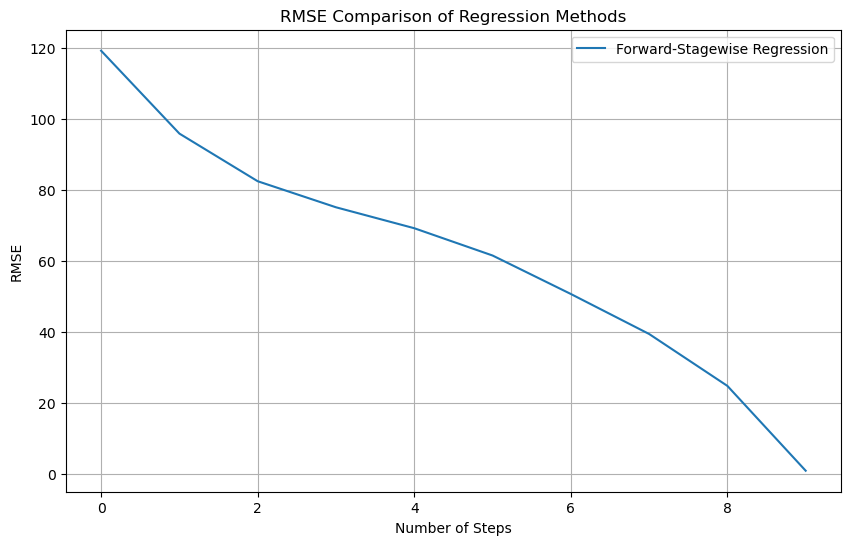

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix Transpose
def transpose(matrix):
    """Transpose a matrix."""
    return list(map(list, zip(*matrix)))

# Matrix Multiplication
def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    if len(A[0]) != len(B):
        raise ValueError("Incompatible dimensions for matrix multiplication.")
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Matrix Inversion (Gauss-Jordan Elimination)
def inverse(matrix):
    """Compute the inverse of a matrix using Gauss-Jordan elimination."""
    n = len(matrix)
    A = [row[:] + [int(i == j) for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        pivot = A[i][i]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        for j in range(n * 2):
            A[i][j] /= pivot
        
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n * 2):
                    A[k][j] -= factor * A[i][j]
    
    return [row[n:] for row in A]

# Linear Model Fitting
def fit_linear_model(X, Y):
    """Fit a linear model to the data X and Y."""
    Xt = transpose(X)
    XtX = matrix_multiply(Xt, X)
    
    if isinstance(Y[0], (float, int)):
        Y = [[y] for y in Y]
    
    XtY = matrix_multiply(Xt, Y)
    try:
        XtX_inv = inverse(XtX)
    except ValueError:
        XtX_inv = np.linalg.pinv(XtX)
    
    B = matrix_multiply(XtX_inv, XtY)
    return B

# Prediction
def predict(X, B):
    """Predict using the linear model coefficients B."""
    return matrix_multiply(X, B)

# RMSE Calculation
def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Square Error."""
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Forward-Stagewise Regression
def forward_stagewise_regression(X, Y, steps=1000, threshold=1e-4):
    """Perform forward-stagewise regression."""
    n_samples, n_features = len(X), len(X[0])
    selected_features = []
    coefficients = [0] * n_features
    residuals = np.array(Y).flatten()
    rmse_history = []

    for _ in range(steps):
        correlations = []
        for i in range(n_features):
            if i in selected_features:
                continue
            X_subset = [[row[j] for j in selected_features] + [row[i]] for row in X]
            try:
                B = fit_linear_model(X_subset, residuals.tolist())
                predictions = np.array(predict(X_subset, B)).flatten()
                new_residuals = residuals - predictions
                correlation = np.corrcoef(residuals, new_residuals)[0, 1]
                correlations.append((correlation, i))
            except ValueError:
                continue
        
        if not correlations:
            break
        
        best_corr, best_feature = max(correlations)
        if abs(best_corr) < threshold:
            break
        
        selected_features.append(best_feature)
        X_subset = [[row[j] for j in selected_features] for row in X]
        B = fit_linear_model(X_subset, Y)
        residuals = np.array(Y).flatten() - np.array(predict(X_subset, B)).flatten()
        rmse_history.append(calculate_rmse(np.array(Y).flatten(), np.array(predict(X_subset, B)).flatten()))
    
    return coefficients, selected_features, rmse_history

# Plotting function to compare methods
def plot_comparison(rmse_results, labels, title):
    """Plot comparison of different methods."""
    plt.figure(figsize=(10, 6))
    for rmse, label in zip(rmse_results, labels):
        plt.plot(rmse, label=label)
    plt.xlabel('Number of Steps')
    plt.ylabel('RMSE')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate synthetic data for comparison
np.random.seed(0)
N = 100  # number of samples
p = 10   # number of features

X = np.random.rand(N, p) * 10
beta_true = np.random.rand(p, 1) * 10
y = np.dot(X, beta_true) + np.random.randn(N, 1)

# Convert to lists for manual processing
X_list = X.tolist()
y_list = y.flatten().tolist()

# Running Forward-Stagewise Regression
_, _, forward_stagewise_rmse = forward_stagewise_regression(X_list, y_list)

# (Additional functions for forward-stepwise, backward-stepwise, and best subset methods should be implemented similarly)

# Plotting RMSE for comparison
rmse_results = [forward_stagewise_rmse]  # Add others like forward_stepwise_rmse, backward_stepwise_rmse here
labels = ["Forward-Stagewise Regression"]  # Add corresponding labels here
plot_comparison(rmse_results, labels, "RMSE Comparison of Regression Methods")


       Weight      Size  Color_Intensity  Sweetness
0  209.762701  8.066899         3.806163  26.864487
1  243.037873  5.620048         7.267091  31.945158
2  220.552675  8.411164         4.399767  20.805339
3  208.976637  9.773131         2.616433  22.758602
4  184.730960  5.492519         1.222109   6.491297


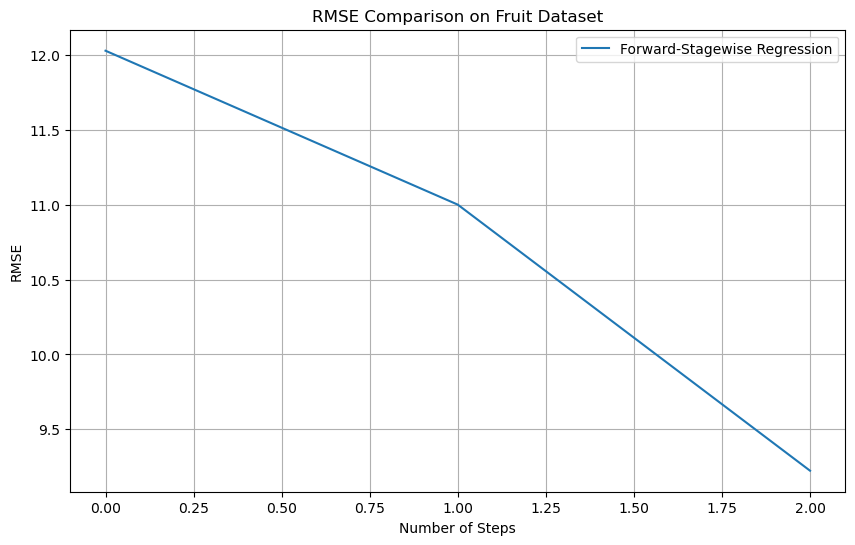

In [17]:
import numpy as np
import pandas as pd

# Generate a synthetic dataset with features: weight, size, color_intensity
np.random.seed(0)

n_samples = 100
weights = np.random.uniform(100, 300, size=n_samples)  # Weight in grams
sizes = np.random.uniform(4, 10, size=n_samples)       # Size in cm
color_intensity = np.random.uniform(1, 10, size=n_samples)  # Color intensity (arbitrary scale)

# Let's assume the sweetness of the fruit depends on these factors
# sweetness = 0.1 * weight + 0.3 * size + 0.5 * color_intensity + noise
sweetness = 0.1 * weights + 0.3 * sizes + 0.5 * color_intensity + np.random.normal(0, 10, size=n_samples)

# Create a DataFrame
fruit_data = pd.DataFrame({
    'Weight': weights,
    'Size': sizes,
    'Color_Intensity': color_intensity,
    'Sweetness': sweetness
})

# Display the first few rows of the dataset
print(fruit_data.head())
# Extract features and target
X = fruit_data[['Weight', 'Size', 'Color_Intensity']].values.tolist()
y = fruit_data['Sweetness'].values.tolist()

# Forward-Stagewise Regression
_, _, forward_stagewise_rmse = forward_stagewise_regression(X, y)

# Plot RMSE to check model performance over steps
plot_comparison([forward_stagewise_rmse], ['Forward-Stagewise Regression'], "RMSE Comparison on Fruit Dataset")



In [25]:
# Import the required library
import pandas as pd

# URL of the dataset
url = 'fruit_data.csv'  # Replace with the actual URL of the dataset

# Load the dataset directly from the URL
df = pd.read_csv(url, sep=',', error_bad_lines=False)  # Skip bad lines

# Display the first few rows of the dataset
print(df)

# Optionally, save the dataset locally if needed
##df.to_csv('local_dataset.csv', index=False)

# Check for missing values or data types
#print(df.info())


    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64
Mean Squared Error: 0.27172741451685606
R-squared: 0.7314614804033541


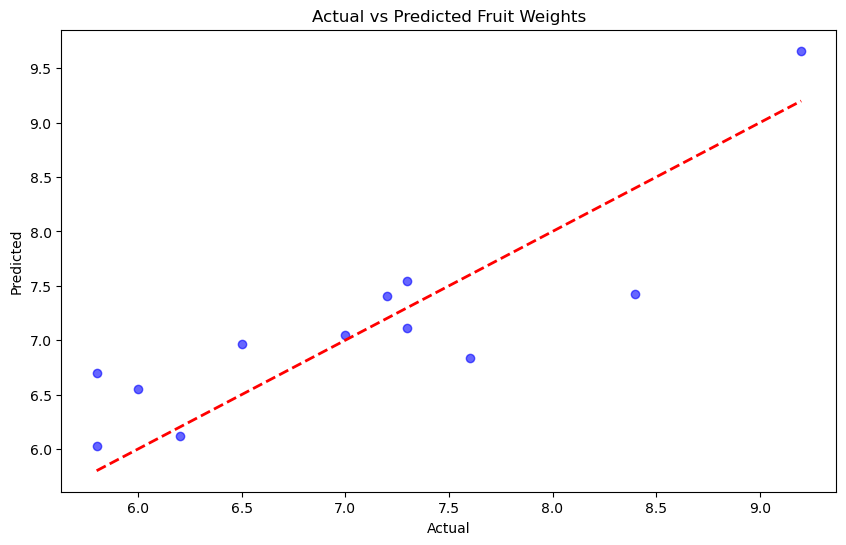

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Replace 'fruit_dataset.csv' with the actual path to the dataset.
df = pd.read_csv('fruit_data.csv')

# Display first few rows of the dataset to understand its structure
print(df.head())

# Check for any missing values
print(df.isnull().sum())

# Let's assume the features are like 'diameter', 'color_score', etc. and we want to predict 'weight'.
# Define the target variable (y) and the feature variables (X)
X = df[['mass', 'color_score']]  # Replace these with actual features from the dataset
y = df['width']  # Replace 'weight' with the actual target variable in your dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Fruit Weights')
plt.show()
